In [33]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import traceback
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error


In [34]:
# Load the dataset
df = pd.read_csv('Ruter-data.csv', sep=';')  

# The first few rows
df.head()


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [35]:
# Preprocess the Data

# Convert 'Dato' to datetime
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')

# Extract additional features from 'Dato'
df['Day'] = df['Dato'].dt.day
df['Month'] = df['Dato'].dt.month
df['Year'] = df['Dato'].dt.year
df['DayOfWeek'] = df['Dato'].dt.dayofweek

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number, 'datetime64']).columns

# Handle missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Convert categorical variables to numeric using label encoding instead of one-hot encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Scale numeric features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the preprocessed data
print(df.head())

# Check for any remaining missing values
print(df.isnull().sum())

# Check data types of all columns
print(df.dtypes)



   TurId       Dato  Fylke  Område  Kommune  Holdeplass_Fra  Holdeplass_Til  \
0   1078 2020-08-10      1       3        4             993            1414   
1   1046 2020-08-15      1       3        4             948              68   
2   1061 2020-08-03      1       3        4            1086            1196   
3   1050 2020-07-27      1       3        4             451             461   
4   1048 2020-08-27      1       3        4             859            1414   

   Linjetype  Linjefylke  Linjenavn  ...  \
0          1           1         10  ...   
1          1           1         10  ...   
2          1           1         10  ...   
3          1           1         10  ...   
4          1           1         10  ...   

   Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra  \
0                                      1777   
1                                      2406   
2                                      1624   
3                                      2612   
4                        

This is a regression problem.
In regression, the goal is to predict a continuous numeric value based on input features. 
In this assignment, we are predicting the number of passengers for a specific date and bus, which is a numeric value.

Shape of X: (6000, 18)
Shape of y: (6000,)
Shape of X_train: (4800, 18)
Shape of X_test: (1200, 18)
Mean Squared Error: 0.9183890994117595
R-squared Score: 0.11299298735164798


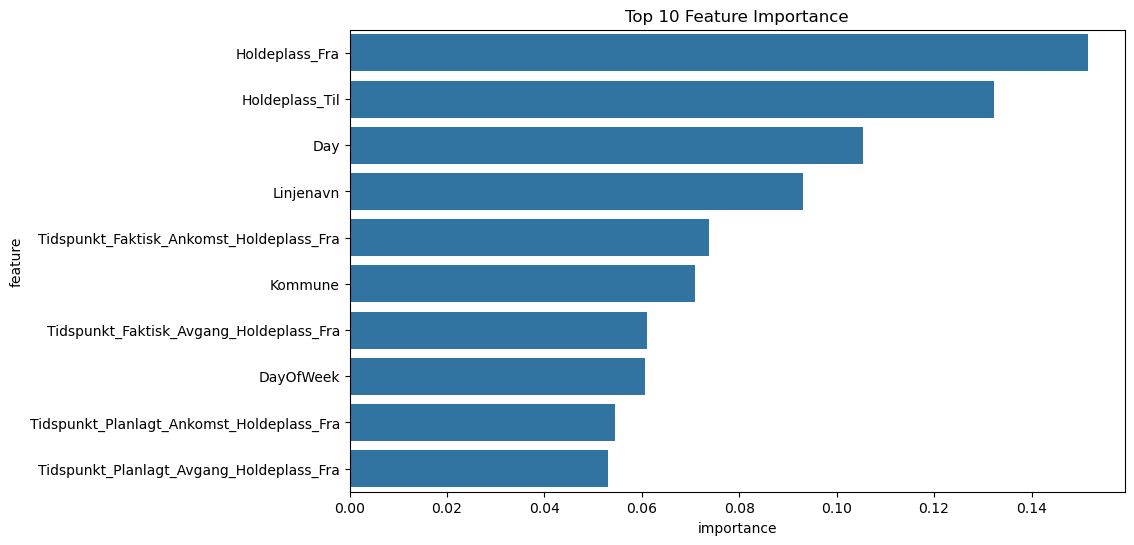

In [36]:
 # Choose an Algorithm and Train the Model

import traceback

try:
    # Separate features and target variable
    X = df.drop(['Passasjerer_Ombord', 'Dato', 'TurId'], axis=1)
    y = df['Passasjerer_Ombord']
    
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)

    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    # Feature importance
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Top 10 Feature Importance')
    plt.show()

except Exception as e:
    print("An error occurred:")
    print(str(e))
    print("\nTraceback:")
    print(traceback.format_exc())



Predicted passengers for 2021-01-01: 0.93
Predicted passengers for 2021-06-15: 1.66
Predicted passengers for 2021-12-31: 1.65

Model Evaluation:
Mean Squared Error: 0.92
R-squared Score: 0.11
Mean Absolute Percentage Error: 1.42
Prediction Percentage Score: -42.40%


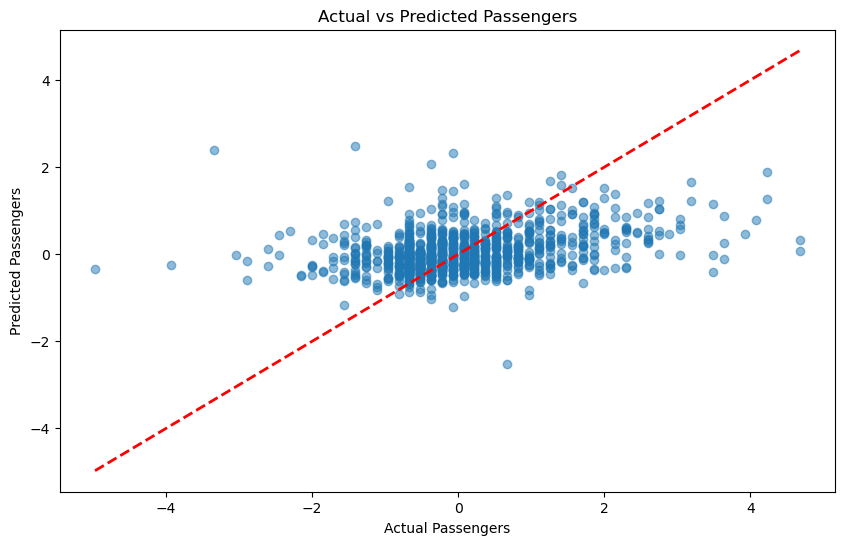

In [37]:
 # Make Predictions and Evaluate the Model
# Function to preprocess a single date
def preprocess_date(date):
    date = pd.to_datetime(date)
    return pd.DataFrame({
        'Day': [date.day],
        'Month': [date.month],
        'Year': [date.year],
        'DayOfWeek': [date.dayofweek]
    })

# Make predictions for specific dates
test_dates = ['2021-01-01', '2021-06-15', '2021-12-31']
predictions = []

for date in test_dates:
    input_data = preprocess_date(date)
    # Add dummy values for other features (you may need to adjust this based on your actual feature set)
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[X.columns]  # Ensure correct order of columns
    prediction = rf_model.predict(input_data)
    predictions.append(prediction[0])

# Print predictions
for date, pred in zip(test_dates, predictions):
    print(f"Predicted passengers for {date}: {pred:.2f}")

# Evaluate the model
y_pred = rf_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
prediction_percentage_score = 100 * (1 - mape)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")
print(f"Prediction Percentage Score: {prediction_percentage_score:.2f}%")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Passengers")
plt.ylabel("Predicted Passengers")
plt.title("Actual vs Predicted Passengers")
plt.show()

